In [ ]:
# Uncrossed Lines

# You are given two integer arrays nums1 and nums2. We write the integers of nums1 and nums2 (in the order they are given) on two separate horizontal lines.

# We may draw connecting lines: a straight line connecting two numbers nums1[i] and nums2[j] such that:

# nums1[i] == nums2[j], and
# the line we draw does not intersect any other connecting (non-horizontal) line.
# Note that a connecting line cannot intersect even at the endpoints (i.e., each number can only belong to one connecting line).

# Return the maximum number of connecting lines we can draw in this way.


'''

# 1. 
# if len(nums1) == 0 or len(nums2) == 0 -> return 0
def max_lines(nums1, nums2) -> return int

# 2

1  5  2  5
1  2  5

- 1-1, 5-5
- 1-1, 2-2, 5-5

# 3
Use DP

n(i~, j~) =
    if nums1[i] == nums2[j]:
        n(i+1~, j+1~)
    else:
        max(n(i+1~, j), n(i~, j+1~))

As a base case, margin i=len(nums1) or j=len(nums2), n(i,j)=0

DP is:
    0 1 2 3 (4)
0   x        0
1            0
2            0
(3) 0 0 0 0  0

time = O(N*M)
space = O(N*M)

# 4
# 5

Build empty table: max_lines_btw_suffixes
Fill in 0 for marging.
for i in range(len(nums1)-1, -1, -1)
    for j in range(len(nums2)-1, -1, -1)
        fill in max_lines_btw_suffixes[i][j]
return max_lines_btw_suffixes[0][0]
'''

# 6
def max_lines(nums1, nums2): # [1,2] [1,3,2]
    if len(nums1) == 0 or len(nums2) == 0:
        return 0
        
    # row: nums2, col: nums1
    dp = [[0] * (len(nums1)+1) for _ in range(len(nums2)+1)]
    for i1 in range(len(nums1)-1, -1, -1): #1,0*
        for i2 in range(len(nums2)-1, -1, -1): # 2,1,0*
            if nums1[i1] == nums2[i2]: # 1 == 1
                dp[i2][i1] = dp[i2+1][i1+1] + 1
            else:
                dp[i2][i1] = max(dp[i2+1][i1], dp[i2][i1+1])

    return dp[0][0]

# nums1 = [1,2]
# nums2 = [1,3,2]

# --i1--
# 2 1 0
# 1 1 0
# 1 1 0
# 0 0 0


# 7
assert max_lines([1,2], [1,3,2]) == 2
# there are lines crossing
assert max_lines([1,5,2,5], [1,2,5]) == 3
assert max_lines("abc", "") == 0
assert max_lines("", "abc") == 0

In [ ]:
# Longest Palindromic Subsequence

# Given a string s, find the longest palindromic subsequence's length in s.

# A subsequence is a sequence that can be derived from another sequence by deleting some or no elements without changing the order of the remaining elements.


'''
# 1.
def max_len_of_palindromic_subsequence(s) -> return int

# 2.
abba
x a y b b a -> find abba inside of this -> return 4

# 3
# 4

x a y a x
            ends with
            x  a  y  a  x
starts  x   1  1  1 1+2 3+2
with    a   -  1  1 1+2 3
        y   -     1  1  1
        a   -        1  1
        x               1

x a y x x

        3  5
           ^
        3> 3
    +2↗️　^  .
    1   1  (when start_idx = end_idx)

# 5
for each end-char,
    fill in dp[end-idx][end-idx] = 1
    fill in dp[end-idx][end-idx-1] = 0 or 2                                                    #################### This is wrong.

    for each start_char (traverse in this order: idx=0<---end_char.prev.prev)
        if start_char == end_char
            dp[before_char][end_char] = dp[before_char.next][end_char.prev]
        else:
            dp[start_char][end_char] = dp[start_char][end_char.prev]                           #################### This is wrong.
    
    return dp[0][0]

time = N**2
space = N**2
'''

# 6.
def max_len_of_palindromic_subsequence(s): # cbc
    if len(s) <= 1:
        return len(s)
    # 1 0 3
    # - 1 0
    # - - 1
    dp  = [[None] * len(s) for _ in range(len(s))]
    for end_idx in range(len(s)): # 0,1,2*
        for start_idx in range(end_idx, -1, -1): # 2,1,0*
            if start_idx == end_idx:
                dp[start_idx][end_idx] = 1
                continue
            if start_idx + 1 == end_idx:
                dp[start_idx][end_idx] = 2 if s[start_idx] == s[end_idx] else 1                  ##################### Fixed this line.
                continue

            if s[start_idx] == s[end_idx]:
                dp[start_idx][end_idx] = dp[start_idx+1][end_idx-1] + 2
            else:
                dp[start_idx][end_idx] = max(dp[start_idx][end_idx-1], dp[start_idx+1][end_idx]) ##################### Fixed this line.

    return dp[0][len(s)-1]

# 7.
assert max_len_of_palindromic_subsequence("xayazx") == 5
assert max_len_of_palindromic_subsequence("aa") == 2
assert max_len_of_palindromic_subsequence("a") == 1
assert max_len_of_palindromic_subsequence("") == 0
# Could fix this by myself.
assert max_len_of_palindromic_subsequence("ab") == 1
# =======================================================================================================================================
# Could not find this.Test case from LC.
assert max_len_of_palindromic_subsequence("cbbd") == 2

#    c b b d
# c  1 1 2 2
# b    1 2 2
# b      1 1
# d        1




In [ ]:
# Integer Break
# Given an integer n, break it into the sum of k positive integers, where k >= 2, and maximize the product of those integers.
# Return the maximum product you can get.

'''
# 1.
# 2 <= n

def max_product(n) -> return int

# 2.

1: None
2:
  1*1 -> 2
3:
  1 * 2     = 2 -> return 2
    * 1 * 1 = 1
4:
  1 * (3)
  2 * (2)
  3 * (1)

# 3

time = n ** 2
space = n

# 4.
# 5.


defind p = [0] as the base case ...
1:
  1 * p(0) # only 1
2:
  2 * p(0) # only 2
  1 * p(1)
3:
  3 * p(0) # only 3
  2 * p(1)
  1 * p(2)
4:
  1 * (3)
  2 * (2)
  3 * (1)


k:
  1 * (3)
  2 * (2)
  k * (0) <- No!!
'''

# 6.
def max_product(k): # 2
    assert 1 <= k

    max_products = [1, 1]
    for n in range(2, k):
        max_products.append(max_product_helper(n, max_products))
    return max_product_helper(k, max_products, False)


def max_product_helper(n, maxes_so_far, allow_no_split=True): # 2, [1,1], False
    max_product = 1
    max_first_num = n if allow_no_split else n - 1

    for first_num in range(1, max_first_num + 1):
        rem_sum = n - first_num
        product = first_num * maxes_so_far[n - first_num]
        max_product = max(max_product, product)

    return max_product

# 7
assert max_product(2) == 1
assert max_product(3) == 2
assert max_product(4) == 4
assert max_product(5) == 6

# ==========================================================================
# Read answer
# So, I could reduce the code with the following idea.

# You may be thinking: what about the constraint where we need to have at least 2 integers? We need to check for 2 separate cases before performing the recursion.

# If n == 2, we immediately return 1. The only possible split is 1 * 1.
# If n == 3, we immediately return 2. The only possible split is 1 * 2.
# We need to explicitly check for these cases before going into the recursion, otherwise, we would incorrectly return a larger answer since we initialize ans = num.

# For all other values of n, the recursion will work. Take a look at the first few numbers:

# For num = 4, we can do 2 * 2 = 4, which is not less than 4 itself.
# For num = 5, we can do 2 * 3 = 6, which is not less than 5 itself.
# For num = 6, we can do 3 * 3 = 9, which is not less than 6 itself.
# As you can see, as n increases, the product from splitting becomes larger and larger, and thus we will always satisfy the requirement of needing to perform at least one split. The only cases where performing a split results in a lower product is 2, 3.


# So, allow_no_split does not matter for 4 <= n.

def max_product(k): # 2
    assert 2 <= k
    if k <= 3:
        # only for k = 1,2,3, no splitting makes the largest sum
        return [None, None, 1, 2][k]

    max_products = [1] # base case
    for n in range(1, k+1):
        max_products.append(max_product_helper(n, max_products))
    
    assert len(max_products) == k + 1
    return max_products[-1]

# Returns the max product.
# This includes the given number itself, which is when no spliting is made.
def max_product_helper(n, maxes_so_far): # 2, [1,1], False
    max_product = n

    for first_num in range(1, n+1):
        rem_sum = n - first_num
        product = first_num * maxes_so_far[n - first_num]
        max_product = max(max_product, product)

    return max_product

# 7
assert max_product(2) == 1
assert max_product(3) == 2
assert max_product(4) == 4
assert max_product(5) == 6



In [ ]:
# Largest Divisibel Subset

# Given a set of distinct positive integers nums, return the largest subset answer such that every pair (answer[i], answer[j]) of elements in this subset satisfies:

# answer[i] % answer[j] == 0, or
# answer[j] % answer[i] == 0
# If there are multiple solutions, return any of them.


'''
# 1.
# nums: set of positive integers
def dividable_pairs(nums) -> return largest subset (set or list)

# 2.

{1,2,3,6,7}
->
{1,3,6}
{1,2,6} -> return 3


{1,2,3,4,6,8}
1
-> 1,2
   -> 1,2
      -> 1,2,4
   -> 1,3
      -> 1,4


(1),
(1), (1,2)
(1), (1,2), (1,3),
(1), (1,2), (1,3), (1,4), (1,2,4)
(1), (1,2), (1,3), (1,4), (1,2,4), (1,6), (1,2,6), (1,3,6)

  (max, cnt) <- (max, nums)
1: (1,1) <- (1, [1])
2: (2,2) <- (2, [1,2])
3: (3,2) <- (3, [1,3])
4: x(4,2),(4,3)
5: (5,2)
6: (6,2) vs (6,3) vs (6,3) => (6,3)

# time = n**2 + nlogn = n**2
# space = n**2

# 4
# 5
- sort nums
- best_pairs = [
    (nums[0], (nums[0]) )
    ]
- for each num,
    append to best_pairs
- return best_pairs[-1][1]
'''

# 6
def dividable_pairs(nums): # [3,1,2,4]
    if len(nums) == 0:
        return []
    nums.sort() # [1,2,3,4]
    # best_groups[idx] represents the longest group which ends with nums[idx]
    best_groups = [(nums[0], [nums[0]])] # max_val, group # (1,[1]), (2, [1,2]), (3, [1,3]) + (4,[1,2,4])

    for i in range(1, len(nums)): #i=1,2,3*
        num = nums[i] # 2,3,4

        curr_best_group = [] # [1,2]->[]->[1,3]->[]
        for max_num, group in best_groups: # 1-[1], 2-[1,2]
            if num % max_num != 0:
                continue
            if len(curr_best_group) < len(group) + 1:
                curr_best_group = group + [num]
        
        best_groups.append((num, curr_best_group))
    
    assert len(best_groups) == len(nums)
    return best_groups[-1][1]

# 7
assert dividable_pairs([3,1,2,4]) == [1,2,4]
assert dividable_pairs([]) == []
assert dividable_pairs([1]) == [1]
####################### My code failed with these test casees in LC
# assert dividable_pairs([3,4]) in ([3], [4])
# assert dividable_pairs([2,3,4,9,8]) == [2,4,8]

# ==================================================================================================
# Failed in LC, and fix.

def dividable_pairs(nums): # [3,1,2,4]
    if len(nums) == 0:
        return []
    nums.sort() # [1,2,3,4]
    global_best_group = [nums[0]]
    # best_groups[idx] represents the longest group which ends with nums[idx]
    best_groups = [(nums[0], [nums[0]])] # max_val, group

    for i in range(1, len(nums)):
        num = nums[i]

        curr_best_group = [num] ###################################
        for max_num, group in best_groups:
            if num % max_num != 0:
                continue
            if len(curr_best_group) < len(group) + 1:
                curr_best_group = group + [num]
        
        best_groups.append((num, curr_best_group))
        if len(global_best_group) <= len(curr_best_group):
            global_best_group =curr_best_group
    
    assert len(best_groups) == len(nums)
    return global_best_group

assert dividable_pairs([3,1,2,4]) == [1,2,4]
assert dividable_pairs([]) == []
assert dividable_pairs([1]) == [1]
# Now these passes.
assert dividable_pairs([3,4]) in ([3], [4])
assert dividable_pairs([2,3,4,9,8]) == [2,4,8]

# ============================================================================================
# I think global max can be calculated in the end for READABILITY.

def dividable_pairs(nums): # [3,1,2,4]
    if len(nums) == 0:
        return []
    nums.sort() # [1,2,3,4]
    # best_groups[idx] represents the longest group which ends with nums[idx]
    max_num_to_best_group = {nums[0]: [nums[0]]} # max_val, group

    for i in range(1, len(nums)):
        num = nums[i]

        curr_best_group = [] # only curr num
        for max_num, group in max_num_to_best_group.items():
            if num % max_num != 0:
                continue
            if len(curr_best_group) < len(group) + 1:
                curr_best_group = group + [num]
        
        max_num_to_best_group[num] = curr_best_group
    
    assert len(max_num_to_best_group) == len(nums)
    return max(max_num_to_best_group.values(), key=lambda group: len(group))

    # global_longest = max(best_groups, key=lambda group: len(group[1]))[]
    return global_longest[1]



assert dividable_pairs([3,1,2,4]) == [1,2,4]
assert dividable_pairs([]) == []
assert dividable_pairs([1]) == [1]
assert dividable_pairs([3,4]) in ([3], [4])
assert dividable_pairs([2,3,4,9,8]) == [2,4,8]





In [ ]:
# Knight Dialer

# The chess knight has a unique movement, it may move two squares vertically and one square horizontally, or two squares horizontally and one square vertically (with both forming the shape of an L). The possible movements of chess knight are shown in this diagram:
# A chess knight can move as indicated in the chess diagram below:


# We have a chess knight and a phone pad as shown below, the knight can only stand on a numeric cell (i.e. blue cell).

# Given an integer n, return how many distinct phone numbers of length n we can dial.
# You are allowed to place the knight on any numeric cell initially and then you should perform n - 1 jumps to dial a number of length n. All jumps should be valid knight jumps.
# As the answer may be very large, return the answer modulo 109 + 7.



'''
# 1. 
# 0 <= n <= 10
# if n == 0 -> return 0
def num_patterns(n)


# 2
1  2  3
4  5  6
7  8  9
x  0  x

# I cannot reach to/from 5 (aside from located initially)

1-8
1-8-3-4-0-6-7-2-9
1-6

# 3
backtracking

# 4.
# 5.
cnt = 0
for each start
  use dfs - depth = 5. in each goal, cnt += 1
return cnt
'''
# 6.

NEXT_NUMS = {
  1: [6,8],
  2: [7,9],
  3: [4,8],
  4: [3,9],
  5: [],
  6: [1,7,0],
  7: [2,6],
  8: [1,3],
  9: [2,4],
  0: [4,6],
}

def num_patterns(n):
  cnt = 0
  for start_num in range(0, 10):
    cnt += num_patterns_helper(start_num, n)
  return cnt

@lru_cache
def num_patterns_helper(start, n_digits):
  if n_digits == 0:
    return 0
  if n_digits == 1:
    return 1 # only start
  
  cnt = 0
  for next_num in NEXT_NUMS[start]:
    cnt += num_patterns_helper(next_num, n_digits - 1)
  return cnt

# 7.
assert num_patterns(0) == 0 # pass
assert num_patterns(1) == 10


In [ ]:
# Given a string s, return the number of palindromic substrings in it.

# A string is a palindrome when it reads the same backward as forward.

# A substring is a contiguous sequence of characters within the string.

'''
# 1. 
# if len(s) == 0 -> return 0
# single char is palindrome.

def num_palindrome_substrings(s)

# 2.
c a b a b
<>
  <>
    <>
  <   >
      <>
    <    >
        <>

 a  a
 <>
 <  >
    <>

# 3.
For each center, 
    count palidrome to left/right ward, increment cnt
return cnt

time  = n**2
space = 1

# 4.
# 5. 
'''

# 6.
def num_palindrome_substrings(s): # aa
   cnt = 0 # 1->2->3
   for i in range(len(s)): # i = 0~1 0*,1*
      for left, right in [(i, i), (i, i + 1)]: # 0,0*   0,1
         while 0 <= left and right < len(s):
            if s[left] != s[right]:
               break
            cnt += 1

            left -= 1
            right += 1
   return cnt


# 7.
assert num_palindrome_substrings("abbab") == 8 # 5 + 1 + 1 + 1

assert num_palindrome_substrings("aa") == 3  # pass
assert num_palindrome_substrings("a") == 1 # pass
assert num_palindrome_substrings("") == 0  # pass

In [ ]:
# Partition Array for Maximum Sum

# Given an integer array arr, partition the array into (contiguous) subarrays of length at most k. After partitioning, each subarray has their values changed to become the maximum value of that subarray.

# Return the largest sum of the given array after partitioning. Test cases are generated so that the answer fits in a 32-bit integer.


'''
# 1.
# 1 <= k
# if len(arr) == 0 -> return 0

def max_sum_of_parititions(arr, k)


# 2.
k = 2
1 3  4 5  3 2
3 3| 5 5| 3 3    -> return 22

k = 3
1 3  4 5  3 2
is
1 3 | 4 5 3|  2
3 3   5 5 5   2  -> sum = 23
or
1 3 4 |5 3 2|
4 4 4  5 5 5     -> sum = 27 -> return 27

4| 4| 4|  5| 5| 5

 -100| 4| 3 | 5 
    4| 4| 3 | 5 

 k = 3
 1 |23| 2| 28| 3
 1 |23| 28  28| 3
 1 |23| 28  28  28
 23 23| 28  28  28

I can pick up to k-1 elements in a row. What is the max num?


up to 3 in a row? what is max sum?
     22,  21,  26,   25,                  24. 29. 31, 25
1st  22   21   26+?  25+max(21,43)
2nd  x    43   47+?  51+max(22)
3rd  x    x    53   73

           
k = 3
      1 | 3 | 4 | 5 | 3 | 2
1st     x   
2nd
3rd
'''

# =================================================================================
# Gave up and read an answer.
class MaxSumCalculator:
    def execute(self, arr, k): # [1,5,3], 2
        self.arr = arr
        self.k = k

        return self.max_sum(0)

    @cache
    def max_sum(self, start_idx): # 2
        if len(self.arr) <= start_idx:
            return 0

        max_sum_all = - float('inf')
        partition_max = - float('inf')
        for i in range(0, self.k): # i=0*,1
            partition_cnt = i + 1 # 1
            partition_end_idx = start_idx + i # 2

            if len(self.arr) <= partition_end_idx: # 
                break
            partition_max = max(partition_max, self.arr[partition_end_idx]) # 3

            max_sum_all = max(
                max_sum_all,
                partition_max * partition_cnt + self.max_sum(partition_end_idx + 1), # 1 * 1 + ?
            )
        return max_sum_all

# time  = N ** k
# space = N ** k

# Code walk-through
# max_sum(0) = max(1 + max_sum(1), 10 + max_sum(2)) = max(1 + 10, 10 + 3) = 13
#     max_sum(1) = max(5 + max_sum(2), 10 + max_sum(3)) = max(5 + 3, 10 + 0) = 10
#         max_sum(2) = max(3 + max_sum(3)) = max(3 + 0) = 3
#             max_sum(3) = 0
#         max_sum(3) = 0
#     max_sum(2) = 3 from memo

assert MaxSumCalculator().execute([1,5,3], 2) == 13
assert MaxSumCalculator().execute([1,3,4,5,3,2], 3) == 27

In [ ]:
# Minimum Operations to Reduce an Integer to 0

# You are given a positive integer n, you can do the following operation any number of times:

# Add or subtract a power of 2 from n.
# Return the minimum number of operations to make n equal to 0.

# A number x is power of 2 if x == 2i where i >= 0.


'''
# 1.
# n: positive inteeger
def min_num_operations_to_zero(n)

# 2.

1 -> 1 - 2**0 = 0 => return 1

7
-> 7 + 2**0 = 8
-> 8 - 2**3 = 0   -> return 2

0
  -> 1
    -> 3, 5, 9,,,,
  -> 2
  -> 4
  -> 8
  -> 16

# 3.
1      2          4          8        16        32
1      2    3     4  4->5   4->6   7<-4    8 ->9 ->10 x ->12 x  14<-  <-15  16
1      2    3     4  4->5   4->6   7<-4    8 ->9 ->10 o11 ->12 o13  14<-  <-15  16


 7
-> 2**2=4 ~ 2**3=8
-> 1 + min(cnt(3), cnt(1))

time = logN
space = N


# 4.
# 5.

Use recursion with memo

@cache
def cnt(n):
      from log2(n), 
      floor_power_of_two = ..
      ceil_power_of_two = ...
      return 1 + min(cnt(floor_power_of_two-n), cnt(n-ceil_power_of_two))
'''

# 6
@cache
def min_num_operations_to_zero(n):
      if n == 0:
            return 0

      floor_log_2_n = math.floor(math.log(n, 2))

      floor = 2 ** floor_log_2_n # 2**2
      ceil = 2 ** (floor_log_2_n + 1) # 2**3

      if n in (floor, ceil):
            return 1

      num_cnt_to_floor = self.minOperations(n - floor) # 1
      num_cnt_to_ceil = self.minOperations(ceil - n)
      # num_cnt_to_floor = min_num_operations_to_zero(floor) # 1  ################# I made this impl mistake !!!!!!!!!!!!!!!!
      # num_cnt_to_ceil = min_num_operations_to_zero(ceil)

      return min(num_cnt_to_floor + 1, num_cnt_to_ceil + 1)


# 7
assert min_num_operations_to_zero(0) == 0 # pass
assert min_num_operations_to_zero(1) == 1 # pass

assert min_num_operations_to_zero(4) == 1 # pass
assert min_num_operations_to_zero(7) == 2 # pass
assert min_num_operations_to_zero(8) == 1 # pass

In [ ]:
# Best Time to Buy and Sell Stock with Transaction Fee

# You are given an array prices where prices[i] is the price of a given stock on the ith day, and an integer fee representing a transaction fee.

# Find the maximum profit you can achieve. You may complete as many transactions as you like, but you need to pay the transaction fee for each transaction.

# # Note:

# # You may not engage in multiple transactions simultaneously (i.e., you must sell the stock before you buy again).
# # The transaction fee is only charged once for each stock purchase and sale.
 
'''
# 1
# prices = [1,3,4,2,1], fee = 5
# if len(prices) == 0 -> return 0
# 0 <= fee
def max_profit(prices, fee) -> return int

# 2

1, 3, 4, 3, 4, 2, 1   fee = 2
^-----^             (get 4 - 2 = 2)
         ^--^       (no, 1 - 2 = -1)

# 3.
keep track of global_profit and local_profit
for each gap,
    if 0 <= gap, update local_profit
    if gap < 0,  update global_profit with local_profit. and reset local_profit.
in the end, update global_profit with local_profit

time  = N
space = 1

# 4
# 5
'''
# 6.
def max_profit(prices, fee): # 0  10  9  11 (fee = 2) -> 9
    if len(prices) <= 1:
        return 0

    dp = [0]# * len(prices) # 0,0->8,0->7,0->9
    for curr_idx in range(1, len(prices)):  # 1,2,3*
        dp.append(dp[curr_idx - 1])
        for prev_idx in range(0, curr_idx): # 0,1,2
            profit = prices[curr_idx] - prices[prev_idx] - fee # 8->7
            dp[curr_idx] = max(dp[curr_idx], dp[prev_idx] + profit)
    return dp[-1]

# 7.
# integrated one
                #  0  1  4  0
assert max_profit([1, 4, 7, 3, 4], 2) == 4

# incresing in a row
assert max_profit([1, 4, 7], 2) == 4

# boundary check
assert max_profit([3, 5], 2) == 0
assert max_profit([3, 6], 2) == 1

# ends with profitable status
assert max_profit([1, 3, 5], 2) == 2

assert max_profit([1], 2) == 0
assert max_profit([], 2) == 0

# =================================================================================
# After this, I read answer and learned O(N) answer below.

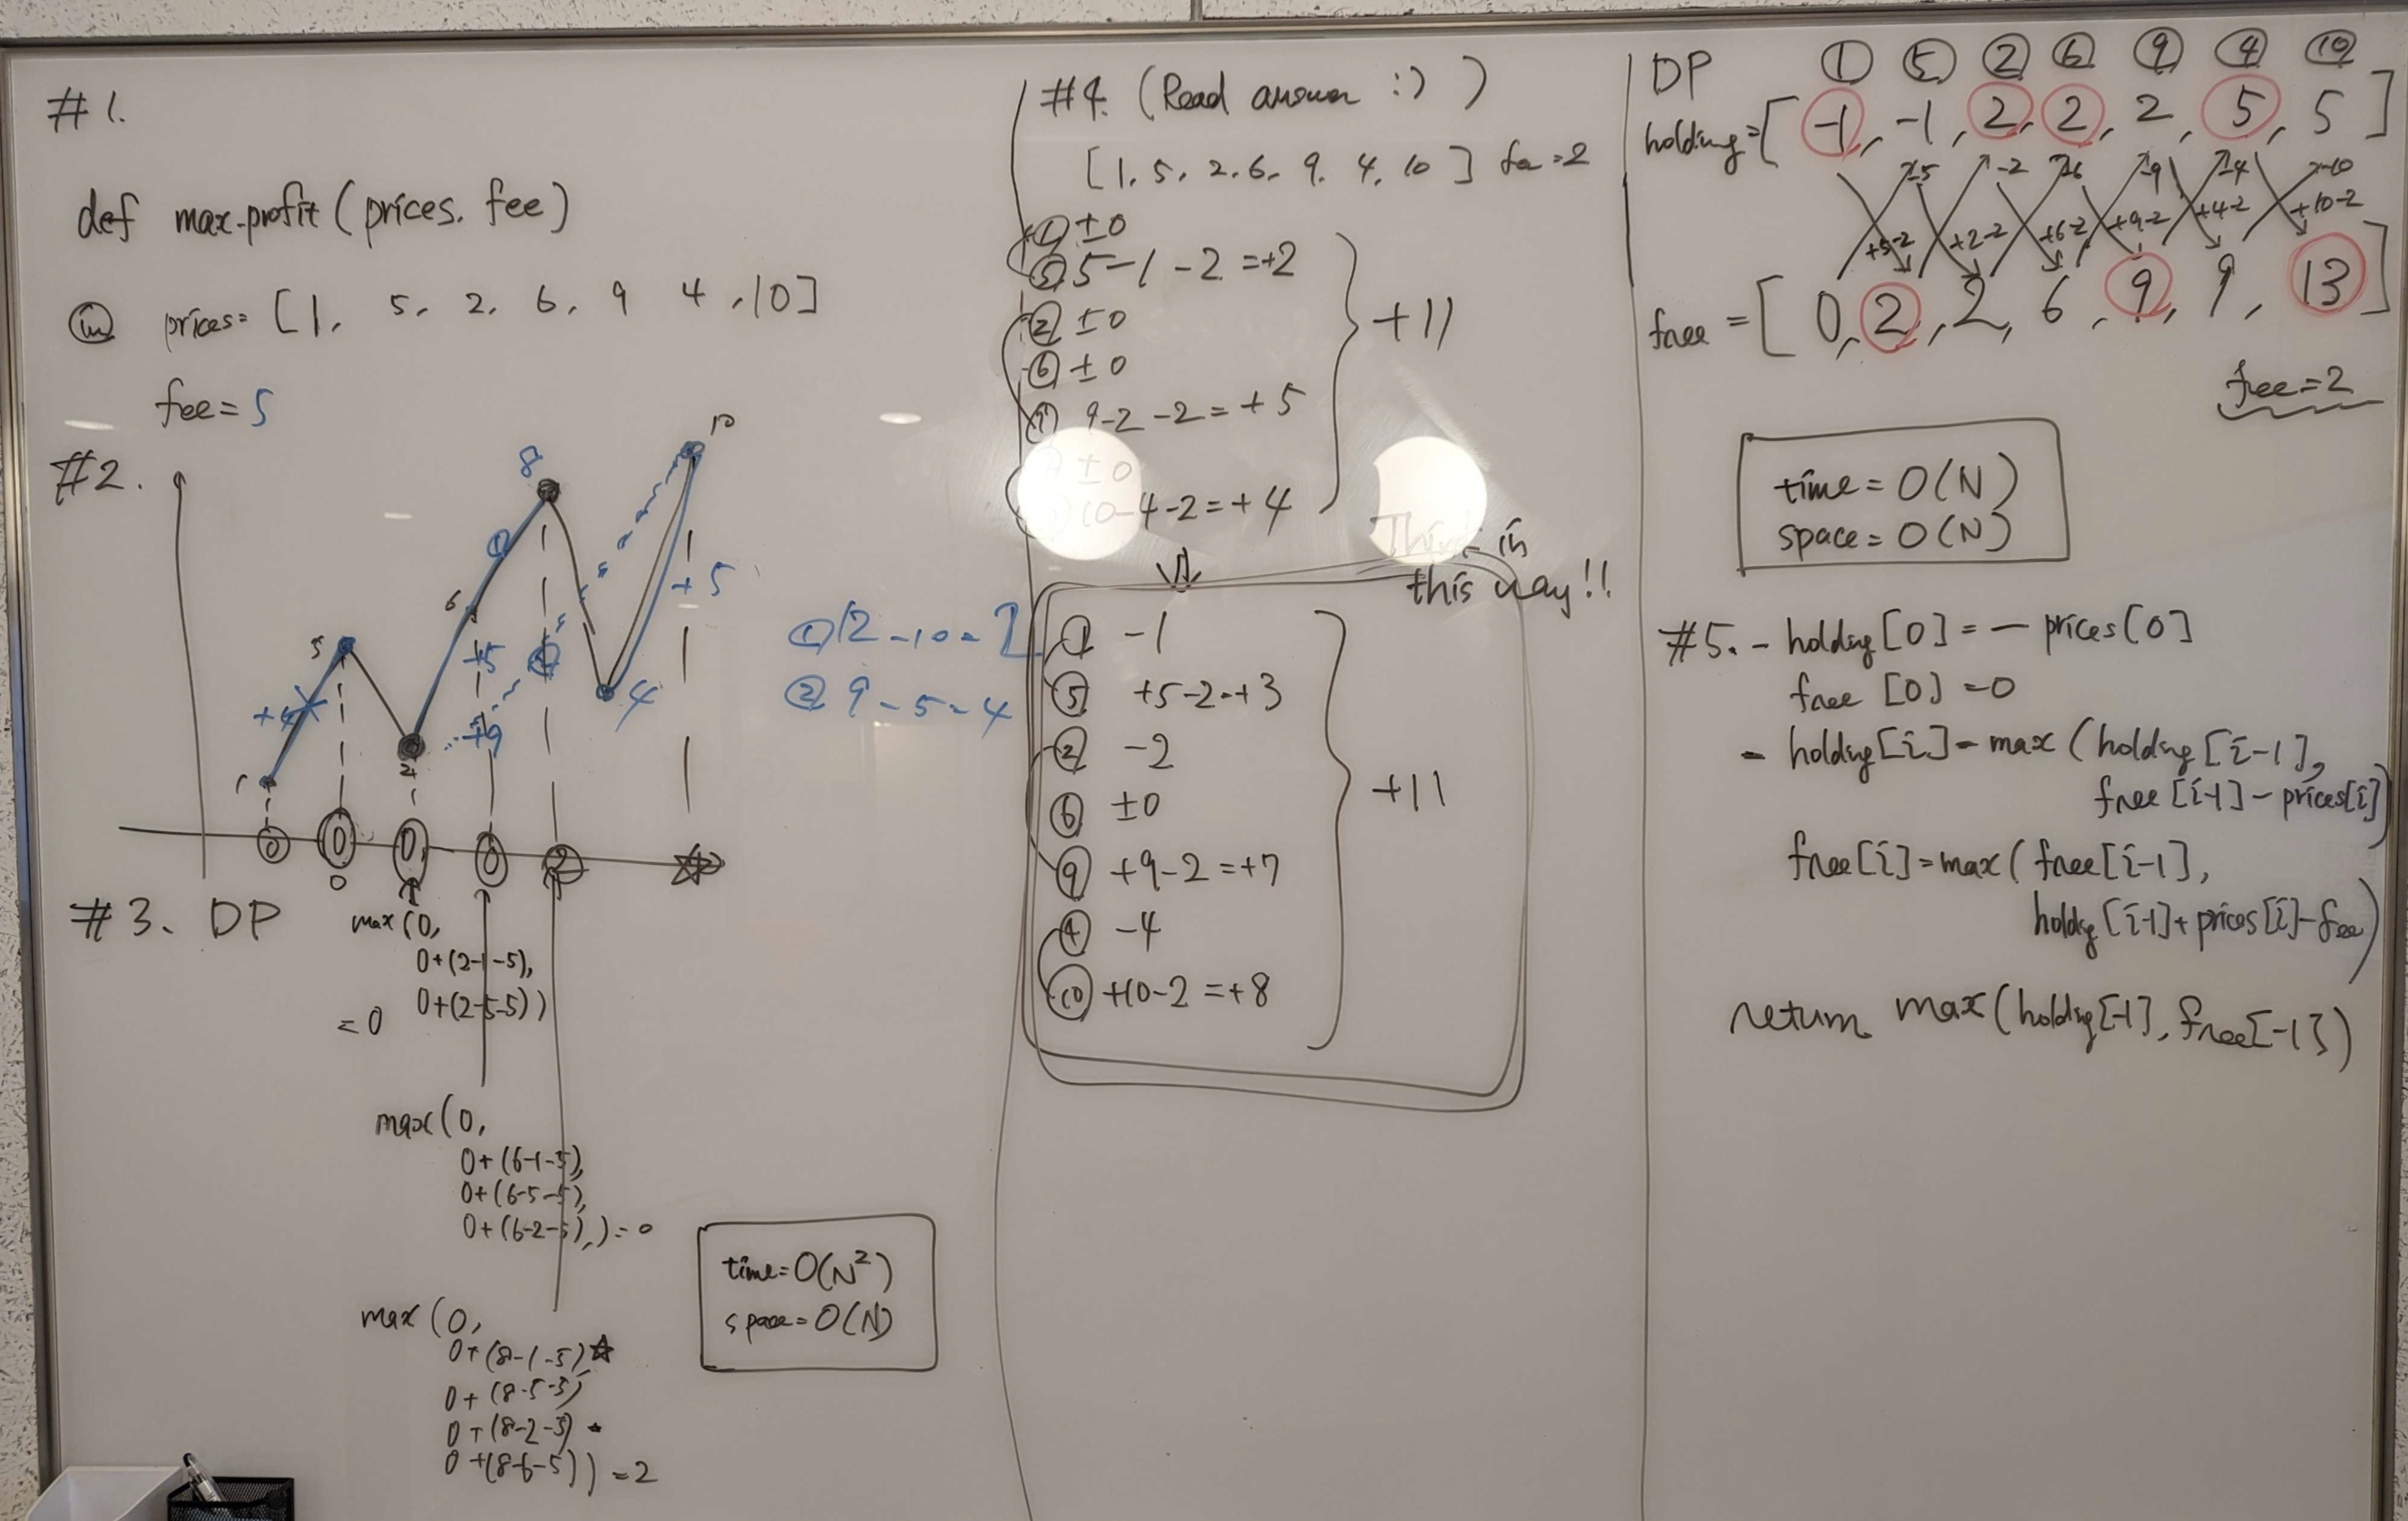
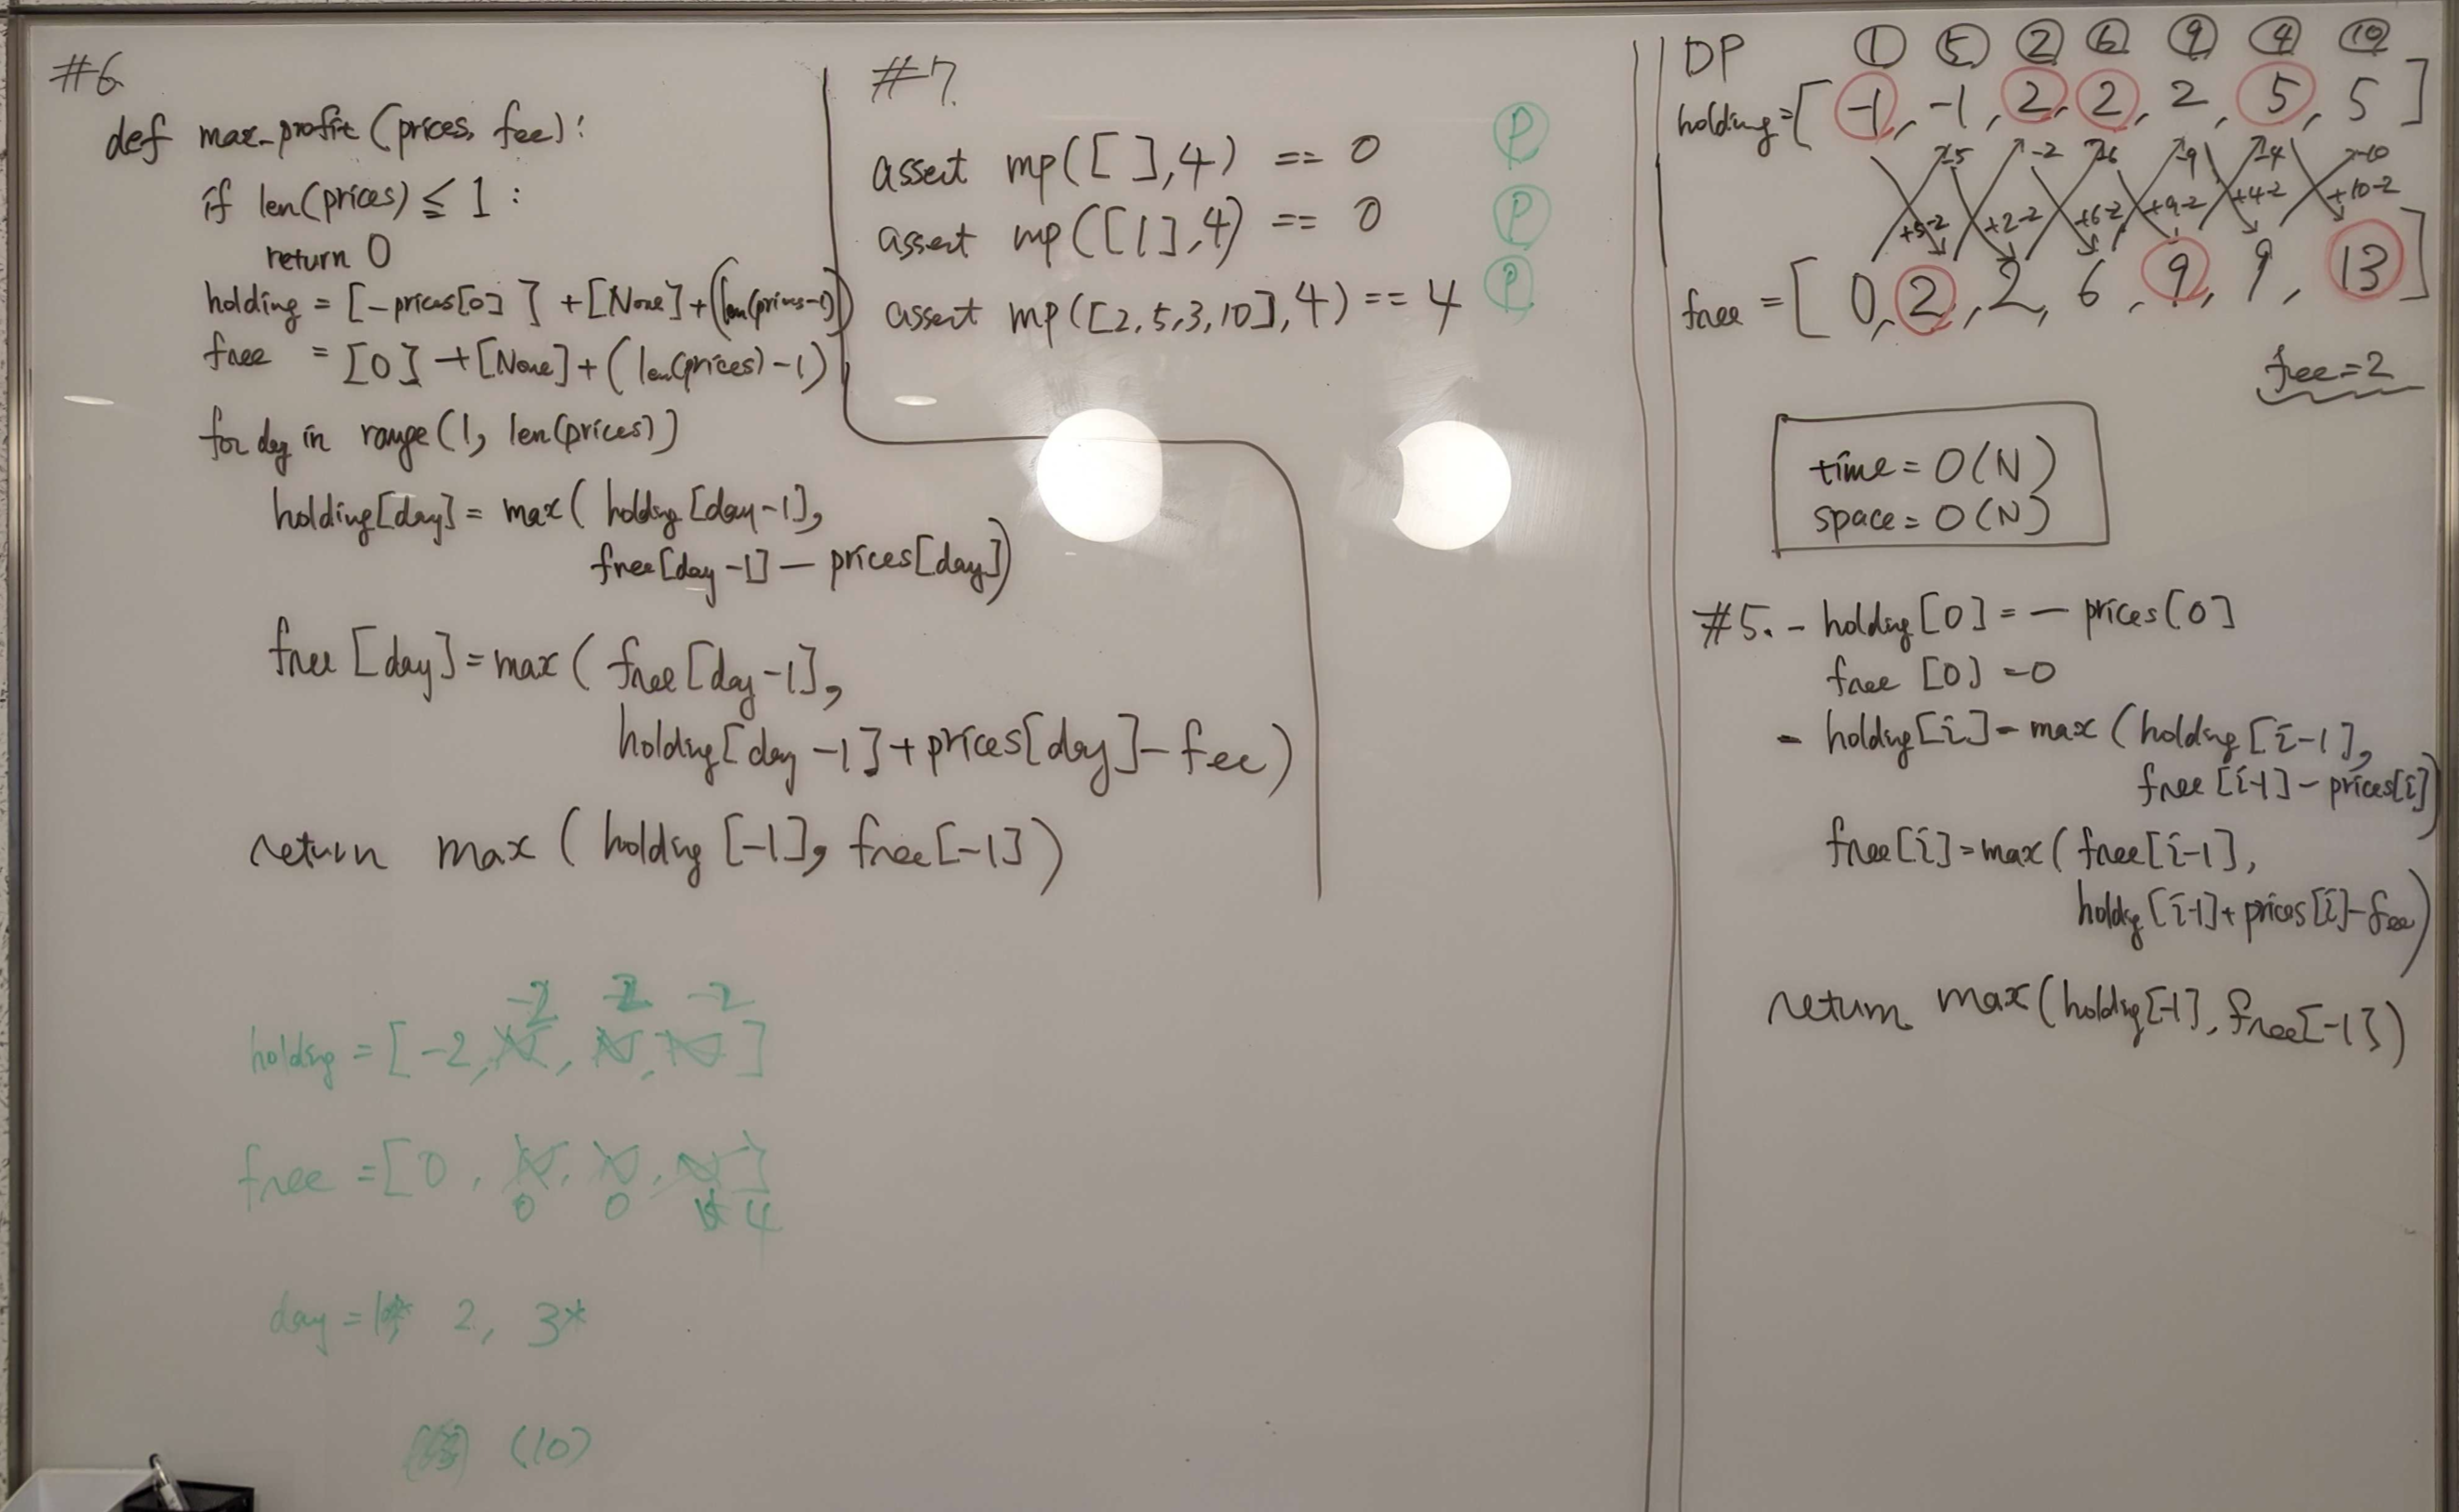

In [ ]:
# Sum of subarray range

# You are given an integer array nums. The range of a subarray of nums is the difference between the largest and smallest element in the subarray.

# Return the sum of all subarray ranges of nums.

# A subarray is a contiguous non-empty sequence of elements within an array.




'''

# 1.

if len(nums) <= 0 -> return None
def sum_of_ranges(nums) -> return int

# 2.
[1, 4, 2]
<--->       4 - 1 = 3
<------>    4 - 1 = 3
    <--->   4 - 2 = 2  -> return 8

# 3. BF
time  = N**3
space = 1

# 4. 


            [1, 4, 0, 5]
max_so_far   1  4  4  5
min_so_far   1  1  0  0

        end idx
            0   1    2    3
        0  1:1 1:4  0:4  0:5
start   1   x  4:4 --------->
idx     2
        3

# time = N**2

# 5.
sum_of_ranges = 0

for each start_idx:
    case of end_idx = start_idx here.
    initiate min_so_far, max_so_far

    for end_idx from stt + 1~
        update min_so_far, max_so_far
        increment sum_of_ranges
return sum_of_ranges

'''
# 6
def sum_of_ranges(nums): # 2,5,0　-> 13
    if len(nums) == 0:
        return None

    sum_ranges = 0 # 3 -> 8 -> 13

    for start_idx in range(len(nums)): # 0,1,*2
        min_so_far = nums[start_idx] # 2 -> 2 -> 0 # 5 -> 0
        max_so_far = nums[start_idx] # 2 -> 5 -> 5 # 5 -> 5

        for end_idx in range(start_idx+1, len(nums)): # *2
            min_so_far = min(min_so_far, nums[end_idx])
            max_so_far = max(max_so_far, nums[end_idx])
            curr_range = max_so_far - min_so_far
            sum_ranges += curr_range

    return sum_ranges

# 7.
assert sum_of_ranges([2,5,0,6]) == 0 + (3 + 5 + 6) + (5 + 6) + 6

assert sum_of_ranges([]) is None
assert sum_of_ranges([1]) == 0



In [ ]:
# Maximum Width Ramp

# A ramp in an integer array nums is a pair (i, j) for which i < j and nums[i] <= nums[j]. The width of such a ramp is j - i.

# Given an integer array nums, return the maximum width of a ramp in nums. If there is no ramp in nums, return 0.


'''
# 1.

if len(nums) <= 1 -> return None
def max_ramp_width(nums)


# 2.

1, 3, 2, 5, 0
<--->
<------>
<-------->     ----> return 4
   <----->
      <-->

# 3.

BF
time  = N**2
space = N**2

# 4.

1 2 3 4 5
1---------> return 4

5 4 3 2  x3  x4   5    6  4   6
         (3) (5) (7)  (x)

monotonic stack (+ hashmap)
time  = N * logN
space = N

# 5.
stack = [] # monotinic strictly decreasing stack
for each num:
    if num < stack top, push to stack.
    if not, while stack top <= num, get max ramp width which ends with num. and update global max.
return global max.
'''


# 6.
def max_ramp_width(nums): # 10, 8, 4, 9 -> 2
    if len(nums) <= 1:
        return None
    
    global_max = 0
    stack = [] # (0:10),(1,8),(2,4)

    for curr_idx, curr_num in enumerate(nums): # (3,9)
        # print("curr_num = ", curr_num)
        if len(stack) == 0 or curr_num < stack[-1][1]:
            stack.append((curr_idx, curr_num))
        else:
            # find index of first element which is smaller or equal to curr_num
            #  10, 8, 4, 4or8or12
            left, right = 0, len(stack)-1 # 0, 2
            # print("started with ", left, right)
            while left < right:
                center = (left + right) // 2 # 1
                if curr_num < stack[center][1]: # 9 <= 8 no.
                    left = center + 1
                else:
                    right = center # 2
            # print("ended with ", left, right)
            assert left == right
            prev_idx, _ = stack[left]

            local_max = curr_idx - prev_idx
            global_max = max(global_max, local_max)

    return global_max

# 7.
assert max_ramp_width([5,3,1,2,4]) == 3

assert max_ramp_width([]) == None
assert max_ramp_width([1]) == None
assert max_ramp_width([1,5]) == 1 # pass
assert max_ramp_width([1,1]) == 1 # pass
assert max_ramp_width([5,1]) == 0 # 0

In [ ]:
# Maximum Earnings From Taxi

# There are n points on a road you are driving your taxi on.
# The n points on the road are labeled from 1 to n in the direction you are going,
#       and you want to drive from point 1 to point n to make money by picking up passengers.
# You cannot change the direction of the taxi.

# The passengers are represented by a 0-indexed 2D integer array rides,
#       where rides[i] = [starti, endi, tipi] denotes the ith passenger requesting a ride from point starti to point endi who is willing to give a tip i dollar tip.

# For each passenger i you pick up, you earn endi - starti + tipi dollars. You may only drive at most one passenger at a time.

# Given n and rides, return the maximum number of dollars you can earn by picking up the passengers optimally.

# Note: You may drop off a passenger and pick up a different passenger at the same point.


'''
# interface

Args:
    1 <= start < end <= n
    len(rides) == 0 -> return 0
def max_earning(n, rides) -> return integer

# example

n = 5
passengers = 
(1,2,11)
(2,5,12)
(3,5,14)


1      2    3      4     5
<-t11-->                           earn (2-1) + 11 = 12 *
        <-------t12------>         earn (5-2) + 12 = 15
            <---t14------>         earn (5-3) + 14 = 16 *  ----> return 12 + 16 = 28


# Algorithm

Use DP

1      2    3      4     5
<-t11-->                           earn (2-1) + 11 = 12 *
        <-------t12------>         earn (5-2) + 12 = 15
            <---t14------>         earn (5-3) + 14 = 16 *  ----> return 12 + 16 = 28

time  = n + len(rids)
space = n


keep track of
- dp = []
build:
- end_to_ride_info = {end -> (start, earning)}

for each datapoint i
    for start, pay in traverse end_to_ride_info[end]
        earning = dp[start] + pay
    Decide dp[i] with max of earnings and dp[i-1]

return dp[-1]
'''
# Impl
def max_earning(n, rides): # 4, [[1,3,11],[2,4,22]]
    if n == 0:
        return 0
    end_to_rid_infos = defaultdict(list) # {3:(1, 13), 4: (2, 24)}
    for start, end, tip in rides:
        end_to_rid_infos[end].append((start, end-start+tip))

    dp = [None] + [0] * n # dp[i] represents max earning at point i.
    # null, 0, 0, 0>13, 0>13>24

    for end in range(2, n+1): # 2,3,*4
        dp[end] = dp[end-1]
        for start, pay in end_to_rid_infos[end]: # 1,13 / 2,24
            dp[end] = max(dp[end], dp[start] + pay)

    return dp[n]
        
        
    
    


# Test
assert max_earning(4, [[1,3,11],[2,4,22]]) == 24
assert max_earning(3, [[1,2,11],[2,3,22]]) == 12 + 23

# just one ride
assert max_earning(2, [[1,2,11]]) == 12
assert max_earning(1, []) == 0 # pass
assert max_earning(0, []) == 0 # pass

In [ ]:
# Count Numbers With Unique Digits II
# Given two positive integers a and b, return the count of numbers having unique digits in the range [a, b] (inclusive).

"""
# 1.
# a <= b
# def cnt_unique_digit_nums(a, b) -> return int


# 1111 -> No
# 1234 -> Yes


# 2.
a = 10, b = 23
10, 12~20, 21, 23
11, 22

# 3.
time = (b - a) * log10 b

# 4

a = 1
b = 1234
 
0~9 ----> 10
=> 10 
   with0: 1
   without: 9

10 ~ 99
=> ? + ? = 81
   with0 = prev-with0 * (10 - 1) = 1 * 9 = 9
   without0 = prev-without0 * (10 - 2) = 9 * 8 = 72

100 ~ 999 
=> ? + ? = 576
   with0 = prev-with0 * (10 - 2) = 9 * 8 = 72
   without0 = prev-without0 * (10 - 3) = 72 * 7 = 504

100 ~ 999 
=> ? + ? = 
   with0 = prev-with0 * (10 - 3) = 72 * 7 = 504
   without0 = prev-without0 * (10 - 4) = 504 * 6 =

# 1 ~ 233
233 = n(~99) + n(1**)     + n(3*)    + n(~3)
    = n(~99) + n(100~999)/9  + n(10~99)/9 + 3
    = 91     + 576/9   + 81/9   + 3
    = ...

4.
2 digit with 0 = 9 numbers
2 digit without 0 = 72 numbers
3 digit with 0 = 72 numbers

12,13
120, 102
130, 103


5.
- dp_zero_included      = [0] <- 1, 9.  72
- dp_not_zero_included  = [0] <- 9, 72, 504

- cnt_unique_digit_nums(b) - cnt_unique_digit_nums(a)

def cnt_unique_digit_nums(upper)
    build dps tilll digits of upper 
    calculate count with equation like n(~99) + n(100~999)/9  + n(10~99)/9 + 3
    return it

"""

class UniqueDigitCounter:
    def __init__(self):
        self.dp_zero_included = None
        self.dp_not_zero_included = None

    def count(self, lower, upper):
        assert lower < upper
        self.build_dp()

        return self.count_till(upper) - self.count_till(lower)

    def build_dp(self):
        self.dp_zero_included = [0, 1]
        self.dp_not_zero_included = [0, 9]

        for digit_cnt in range(2, 11):
            prev_with_zero = self.dp_zero_included[-1]
            prev_without_zero = self.dp_not_zero_included[-1]

            curr_with_zero = prev_with_zero * (10 - digit_cnt + 1)
            curr_without_zero = prev_without_zero * (10 - digit_cnt)

            self.dp_zero_included.append(curr_with_zero)
            self.dp_not_zero_included.append(curr_without_zero)

        # print(self.dp_zero_included, self.dp_not_zero_included)


    # 233 = n(~99) + n(1**)     + n(3*)    + n(~3)
    #     = n(~99) + n(100~999)/9  + n(10~99)/9 + 3
    #     = 91     + 576/9   + 81/9   + 3
    def count_till(self, n):
        cnt = 0
        num_digits = math.floor(math.log(10, n)) + 1

        for ith_digit in range(1, num_digits):
        
    # I stopped implementation here.


assert UniqueDigitCounter().count(0, 9) == 10
assert UniqueDigitCounter().count(99, 12) == 100 - 9


# ================================================================================
# Read answer.
# I did not have to use DP....

class Solution:
    def numberCount(self, a: int, b: int) -> int:
        assert a <= b
        assert 0 <= a <= 9876543210
        assert 0 <= b <= 9876543210

        cnt = 0
        for n in range(a, b + 1):
            if self.has_unique_digits(n):
                cnt += 1
        return cnt


    def has_unique_digits(self, n):
        digit_cnt = len(str(n))
        unique_digit_cnt = len(set(str(n)))
        
        return digit_cnt == unique_digit_cnt

        

In [ ]:
# Longest Unequal Adjacent Groups Subsequence I

# You are given a string array words and a binary array groups both of length n, where words[i] is associated with groups[i].

# Your task is to select the longest alternating subsequence from words.
# A subsequence of words is alternating if for any two consecutive strings in the sequence, their corresponding elements in the binary array groups differ. Essentially, you are to choose strings such that adjacent elements have non-matching corresponding bits in the groups array.

# Formally, you need to find the longest subsequence of an array of indices [0, 1, ..., n - 1] denoted as [i0, i1, ..., ik-1], such that groups[ij] != groups[ij+1] for each 0 <= j < k - 1 and then find the words corresponding to these indices.

# Return the selected subsequence. If there are multiple answers, return any of them.

# Note: The elements in words are distinct.

'''
# 1
words  (string array, len n) = ["cat", "dog", "pet"]
groups (binary array, len n) = [1,      1,       0]
=> return [cat, pet], or [dog pet] (len = 2)


# 2. 
[1 0 1 0 0 1 0 1]
if start with 0th, 1010101 = len7
if skip 0th, 010101 = len6

# 3.

1 0 0 0 1 1 0 1

-> 1 0 1 0 1 0 1 0

Use greedy
time  = O(N)
space = O(avgS * N) for returned array

# 4
# 5
- pick first number, and set prev bit
- traverse string, group
     if bit differs from previous bit,
     append string to ret
     update curret bit
- return cnt
'''

# 6.
def longest_alternating_subsequence(words, groups): # ["a1", "b0", "c0"], [1, 0 ,0]
    if len(words) == 0:
        return []

    sequences = [words[0]] # a1, b0
    prev_bit = groups[0]   # 1 -> 0

    for i in range(1, len(words)): # 1, 2*
        word, curr_bit = words[i], groups[i] # b0, 0 -> c0, 0
        if prev_bit != curr_bit:
            sequences.append(word)
            prev_bit = curr_bit
    return sequences



# 7.
assert longest_alternating_subsequence(
    ["a1", "b0", "c0"],
    [1, 0, 0],
) in (["a1", "b0"], ["a1", "c0"])

assert longest_alternating_subsequence([], []) == []

In [ ]:
# You are given an integer array prices where prices[i] is the price of a given stock on the ith day.

# On each day, you may decide to buy and/or sell the stock. You can only hold at most one share of the stock at any time. However, you can buy it then immediately sell it on the same day.

# Find and return the maximum profit you can achieve.


'''
# 1
# each of prices is positive integer.
# each profit = sell - buy

def max_profit(prices) -> integer


# 2
2   4  3  1  5
o---x     o--x  => 2 + 4 = 6

2   4  6  1  5
o---x     
    o--x  o--x  => 4 + 4 = 8
    

points
- if going up, keep it. And when peak, sell it.
- at local min, buy it. at local max, sell it.


# 3.
- at local min, buy it. at local max, sell it.
time = n
space = 1

# 4
# 5.

price_at_purchase = None
Traverse each price
   If local min, price_at_purchase = price
   If local max, profit = price - price_at_purchase. Also, price_at_purchase = None
return profit
'''

# 6
def max_profit(prices): # [2,3,0,1]
      if len(prices) <= 1:
            return 0

      profit = 0 # -> 1 -> 2
      price_at_purchase = None # -> 2 -> None -> 0 -> None

      for day, price in enumerate(prices): #[*2,3,0,1] 0,2->1,3->2,0->3,1
            if is_local_min(prices, day):
                  assert price_at_purchase is None
                  price_at_purchase = price

            elif is_local_max(prices, day):
                  assert price_at_purchase is not None
                  profit += price - price_at_purchase # 1
                  price_at_purchase = None
      return profit

def is_local_min(prices, day):
      assert len(prices) != 0
      if day == 0:
            return prices[0] < prices[1]
      if day == len(prices) - 1:
            return prices[-2] > prices[-1]
      return prices[day - 1] > prices[day] and prices[day] < prices[day + 1]

def is_local_max(prices, day):
      assert len(prices) != 0
      if day == 0:
            return prices[0] > prices[1]
      if day == len(prices) - 1:
            return prices[-2] < prices[-1]
      return prices[day - 1] < prices[day] and prices[day] > prices[day + 1]

# 7.
assert max_profit([2,3,0,1]) == 2 # pass
assert max_profit([1]) == 0
assert max_profit([]) == 0

# =====================================================================================
# I found some mistakes in LC submission.
# These failed!!!!!!!!!!!!!!!!!!!!!!!!!!
assert max_profit([7,2,5]) == 3
assert max_profit([2,2,5]) == 3

def max_profit(prices): # [2,3,0,1]
      if len(prices) <= 1:
            return 0

      profit = 0 # -> 1 -> 2
      price_at_purchase = None # -> 2 -> None -> 0 -> None

      for day, price in enumerate(prices): #[*2,3,0,1] 0,2->1,3->2,0->3,1
            if price_at_purchase is not None:
                  profit += price - price_at_purchase # 1
                  price_at_purchase = None                  

            if day <= len(prices) - 2 and prices[day] < prices[day + 1]:
                  price_at_purchase = price

      return profit

# ===================================================================================
# I read an answer.
I overcomplicated it.

def max_profit(prices): # [2,3,0,1]
      profit = 0
      for day in range(len(prices)-1):x
            daily_profit = prices[day+1] - prices[day]
            profit += max(0, daily_profit)
      return profit


assert max_profit([2,3,0,1]) == 2 # pass
assert max_profit([1]) == 0
assert max_profit([]) == 0
assert max_profit([7,2,5]) == 3
assert max_profit([2,2,5]) == 3

assert max_profit([2,5,2]) == 3
assert max_profit([2,5,5,5,7]) == 5
assert max_profit([2,5,5,5]) == 3
